# 1. Simulation in Sociology, Moretti (2002)

See attached PDF.

# 2. Simulating your income

## (a) Answer of Question 1

In [1]:
# Import initial packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [2]:
def inc_sim(p):
    
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
        'inc0'        : integer,    #starting income
        'gr'          : float,      #long-run growth rate of income
        'rho'         : flot,       #postive dependence of today's income on last period's income
        'st_year'     : integer,    #start year
        'w_years'     : integer,    #years to work
        'sd'          : float,      #standard deviation of lognormal distribution
        'num_draws'   : integer,    #simulations
        'mu'          : float,      #mean of lognormal distribution
    }
    """    

    #set random seed
    np.random.seed(524)

    lognorm_errors = np.random.normal(p['mu'], p['sd'],(p['w_years'], p['num_draws']))

    #create a matrix of dim (w_years, num_draws)
    ln_income_mat = np.zeros((p['w_years'], p['num_draws']))

    #fill the matrix
    ln_income_mat[0, :] = np.log(p['inc0']) + lognorm_errors[0, :]

    #loop and apply model
    for yr in range(1, p['w_years']):
        ln_income_mat[yr, :] = (1 - p['rho']) * (np.log(p['inc0']) + p['gr'] * (yr)) +\
                                p['rho'] * ln_income_mat[yr - 1, :]  + lognorm_errors[yr, :]
    
    #dealing with large numbers so put in terms of 10k's                                                    
    income_mat = np.exp(ln_income_mat) 
    return income_mat



In [3]:
simulation_profile = {
    'inc0'        : 80000,
    'gr'          : 0.025,
    'rho'         : 0.4,
    'st_year'     : int(2020),
    'w_years'     : 40,
    'sd'          : 0.13, 
    'num_draws'   : 10000,
    'mu'          : 0
}

income_mat = inc_sim(simulation_profile)
print(income_mat)
 

[[ 66409.15585396  98274.13534194 101939.81109509 ...  98720.39690442
   72404.51636886  68710.32820307]
 [ 80020.53020329  67383.19350738  84557.85626308 ...  68247.7770509
   74518.33613244  80555.96068584]
 [ 75805.26636606  66134.42494243  91458.20304692 ...  67268.53350159
   90012.42673528  80645.62355527]
 ...
 [272690.56519108 217821.73027242 184724.24512469 ... 159922.45424852
  253961.68337673 209741.55004062]
 [231539.17420799 202509.15149494 197955.96626493 ... 199502.43481758
  210951.71828579 205420.27946389]
 [197895.95201384 165115.10025278 172644.86927513 ... 248654.44847819
  234237.14656466 221566.29879732]]


Then we plot one of lifetime income paths:

Text(0, 0.5, 'Annual Income (\\$s)')

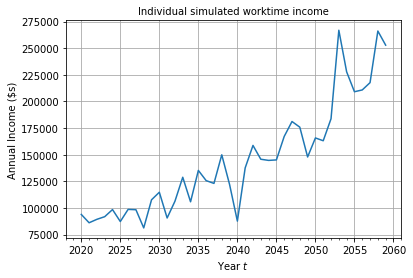

In [4]:
%matplotlib inline
p = simulation_profile
year_vec = np.arange(p['st_year'], p['st_year'] + p['w_years'])
individual = 500
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated worktime income', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income (\$s)')

## (b) Answer of Question 2

Text(0.5, 1.0, 'Histogram for Simulated Starting Income')

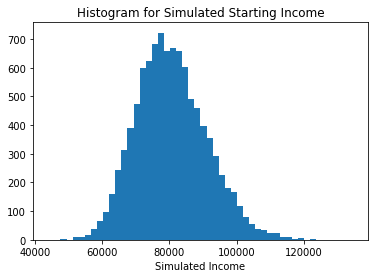

In [5]:
# plot the histogram
plt.hist(income_mat[0,:], bins=50)
plt.xlabel("Simulated Income")
plt.title("Histogram for Simulated Starting Income")

Accroding to the histogram above, the distribution is nearly normal, but it is slightly right skewed.

Counting the percent of the class who earn more than 100000:

In [6]:
income_above = np.mean(income_mat[0, :] > 100000)
print(income_above)

0.0417


So 4.17% of my class will earn more than $100000 in the first year out of the program.

Counting the percent of the class who earn less than 70000:

In [7]:
income_below = np.mean(income_mat[0, :] < 70000)
print(income_below)

0.1512


And 15.12% of the class will earn less than $70000 in the first year out of the program.

## (c) Answer of Question 3

In [8]:
def repay_sim(p,income_mat):
    '''
    Simulate the amount of repay
    
    Inputs: p: simulation profile
            income_matrix:a matrix of income
    Returns: a matrix of the amount of repay
    
    '''
    repay = np.zeros((p['w_years'], p['num_draws']))
    repay[0, :] = income_mat[0,:] * 0.1
    for yr in range(1,p['w_years']):
        repay[yr,:] = repay[yr - 1,:] + income_mat[yr, :] * 0.1
    return repay

In [9]:
def repay_yr(p,income_mat):
    '''
    Calculate the year when I can payoff the loan
    Inputs: p: simulation profile
            income_matrix:a matrix of income
    
    Returns: a list of the year when I can payoff the loan
    '''
    repay_yr = [0] * p['num_draws']
    repay = repay_sim(p, income_mat)
    for i in range(p['num_draws']):
        for yr in range(p['w_years']):
            if repay[yr,i] >= 95000:
                repay_yr[i] = yr + 1
                break
    return repay_yr

In [10]:
def cal_percent(p, ls):
    '''
    Calculate the percent of the simulations that I am able to pay off the loan
    Inputs: p: simulation profile
            repay_yr:a list of the year when I can payoff the loan
    Returns: the percent of the simulations that I am able to pay off the loan
    
    '''
    num=0
    for i in range(p['num_draws']):
        if ls[i] <= 10:
            num = num + 1
    percent = num/p['num_draws']
    return percent  

Calculate the percent of simulation that I am able to pay off the loan in 10 year:

In [11]:
repay_yrs= repay_yr(simulation_profile, income_mat)
percent = cal_percent(simulation_profile, repay_yrs)
print(percent)

0.1678


So in 16.78% of the simulation I am able to pay off the loan in 10 years.

Then we plot the histogram of how many years it takes to pay off the loan in each of 10000 simulations:

Text(0.5, 1.0, 'Histogram for years to pay off the loan')

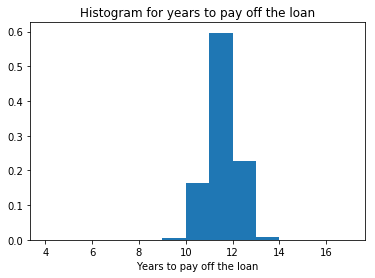

In [12]:
plt.hist(repay_yrs, density = True, bins = np.arange(min(repay_yrs) -5, max(repay_yrs) +5))
plt.xlabel("Years to pay off the loan")
plt.title("Histogram for years to pay off the loan")

## (d) Answer of Question 4

In [13]:
new_simulation_profile = {
    'inc0'        : 90000,
    'gr'          : 0.025,
    'rho'         : 0.4,
    'st_year'     : int(2020),
    'w_years'     : 40,
    'sd'          : 0.17, 
    'num_draws'   : 10000,
    'mu'          : 0
}

income_mat = inc_sim(new_simulation_profile)
print(income_mat)

[[ 70550.46142451 117783.33011091 123561.20729139 ... 118483.24080508
   78992.81966812  73764.25171169]
 [ 89615.63768821  71575.56495871  96317.75493523 ...  72778.88084775
   81644.3347736   90400.57899801]
 [ 82955.30101689  69396.06916251 106035.55593099 ...  70956.3661129
  103848.93176006  89949.09077038]
 ...
 [338309.11761165 252187.52025149 203293.03644369 ... 168361.21927259
  308250.29858492 240024.49205936]
 [271061.07048342 227502.32436192 220836.5697397  ... 223095.32811759
  239983.96514044 231788.44418303]
 [219057.46748997 172865.33333479 183245.71710131 ... 295275.8618388
  273090.00167035 253934.86273481]]


In [14]:
new_inc = inc_sim(new_simulation_profile)
new_repay_yr = repay_yr(new_simulation_profile,new_inc)
new_percent = cal_percent(new_simulation_profile,new_repay_yr)
print(new_percent)

0.7602


Accodring to the result, in 76.02% of the simulations that I am able to pay off the loan in 10 years.

Then we plot the new histogram of how many years it takes to pay off my loan of $95,000 in my new 10,000 simulations with the new standard deviation and the new average initial salary

Text(0.5, 1.0, 'Histogram for years to pay off the loan')

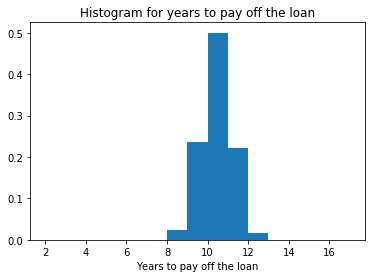

In [15]:
plt.hist(new_repay_yr, density = True, bins = np.arange(min(new_repay_yr) -5, max(new_repay_yr) +5))
plt.xlabel("Years to pay off the loan")
plt.title("Histogram for years to pay off the loan")